In [3]:
library(tidyverse)
library(RColorBrewer)
library(sf)
library(ggthemes)
library(ggrepel)
library(stringr)

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Linking to GEOS 3.13.0, GDAL 3.8.5, PROJ 9.5.1; sf_use_s2() is TRUE



In [32]:
constructor_results <- read_csv("constructor_results.csv", show_col_types = FALSE)
constructors <- read_csv("constructors.csv", show_col_types = FALSE)
races <- read_csv("races.csv", show_col_types = FALSE)

In [14]:
options(repr.plot.width =15, repr.plot.height =10)

In [44]:
constructor_data <- constructor_results %>%
  left_join(constructors, by = "constructorId") %>%
  left_join(races, by = "raceId") %>%
    select(
        constructorResultsId,
        raceId,
        points,
        constructorRef,
        teamName = name.x,
        year,
        round,
        circuitId,
        circuitName = name.y
    )

In [45]:
# Create a mapping of the most recognizable team colors
# We'll use a named vector approach to avoid counting errors
team_color_mapping <- c(
  # Modern teams (most recognizable colors)
  "mclaren" = "#F47600",        # Papaya Orange
  "ferrari" = "#ED1131",        # Ferrari Red
  "mercedes" = "#00D7B6",       # Petronas Turquoise
  "red_bull" = "#4781D7",       # Red Bull Blue
  "williams" = "#1868DB",       # Williams Blue
  "renault" = "#FFF500",        # Renault Yellow
  "alpine" = "#00A1E8",         # Alpine Pink
  "bmw_sauber" = "#01C00E",     # BMW Blue
  "sauber" = "#00FF00",         # Sauber Green
  "toro_rosso" = "#6C98FF",     # Toro Rosso Blue
  "alphatauri" = "#FFFFFF",     # AlphaTauri White
  "force_india" = "#FF80C7",    # Force India Pink
  "racing_point" = "#FF80C7",   # Racing Point Pink
  "haas" = "#9C9FA2",           # Haas White/Red
  "toyota" = "#E60012",         # Toyota Red
  "honda" = "#FFFFFF",          # Honda White
  "jaguar" = "#0F4D2C",         # British Racing Green
  "jordan" = "#FFD700",         # Jordan Yellow
  "minardi" = "#FF0000",        # Minardi Red
  "benetton" = "#0090D0",       # Benetton Blue
  "brawn" = "#FFFF00",          # Brawn GP Yellow
  "lotus_f1" = "#FFD700",       # Lotus Gold
  "lotus_racing" = "#00FF00",   # Lotus Green  
  "caterham" = "#00FF00",       # Caterham Green
  "marussia" = "#FF0000",       # Marussia Red
  "virgin" = "#FF0000",         # Virgin Red
  "hrt" = "#F91536",            # HRT Red
  "manor" = "#FF0000",          # Manor Red
  "rb" = "#6C98FF",             # RB Blue
  "matra" = "#0000FF",          # Matra Blue
  "brabham" = "#FFFFFF",        # Brabham White
  "lotus-ford" = "#FFD700",     # Classic Lotus Gold
  "cooper" = "#0000FF",         # Cooper Blue
  "vanwall" = "#00D2BE",        # Vanwall Green
  "maserati" = "#DC143C",       # Maserati Red
  "alfa" = "#DC143C",           # Alfa Romeo Red
  "aston_martin" = "#229971",   # Aston Martin Green
  "porsche" = "#000000",        # Porsche Black
  "bmw" = "#0000FF",            # BMW Blue
  "lancia" = "#DC143C",         # Lancia Red
  "bugatti" = "#0000FF"         # Bugatti Blue
)

# Convert to data frame for joining
team_colors <- data.frame(
  constructorRef = names(team_color_mapping),
  official_color = as.character(team_color_mapping),
  stringsAsFactors = FALSE
)

# Merge the constructors data with team colors
constructor_data <- constructor_data %>%
  left_join(team_colors, by = "constructorRef") %>%
  # For any teams without assigned colors, use a default color
  mutate(official_color = ifelse(is.na(official_color), "#808080", official_color))

# Display the first few rows to verify
head(constructor_data, 10)

constructorResultsId,raceId,points,constructorRef,teamName,year,round,circuitId,circuitName,official_color
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,18,14,mclaren,McLaren,2008,1,1,Australian Grand Prix,#F47600
2,18,8,bmw_sauber,BMW Sauber,2008,1,1,Australian Grand Prix,#01C00E
3,18,9,williams,Williams,2008,1,1,Australian Grand Prix,#1868DB
4,18,5,renault,Renault,2008,1,1,Australian Grand Prix,#FFF500
5,18,2,toro_rosso,Toro Rosso,2008,1,1,Australian Grand Prix,#6C98FF
6,18,1,ferrari,Ferrari,2008,1,1,Australian Grand Prix,#ED1131
7,18,0,toyota,Toyota,2008,1,1,Australian Grand Prix,#E60012
8,18,0,super_aguri,Super Aguri,2008,1,1,Australian Grand Prix,#808080
9,18,0,red_bull,Red Bull,2008,1,1,Australian Grand Prix,#4781D7


In [77]:
constructor_data_2024 <- constructor_data %>% filter(year == 2024)
head(constructor_data_2024)

constructorResultsId,raceId,points,constructorRef,teamName,year,round,circuitId,circuitName,official_color
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
16890,1121,44,red_bull,Red Bull,2024,1,3,Bahrain Grand Prix,#4781D7
16891,1121,27,ferrari,Ferrari,2024,1,3,Bahrain Grand Prix,#ED1131
16892,1121,16,mercedes,Mercedes,2024,1,3,Bahrain Grand Prix,#00D7B6
16893,1121,12,mclaren,McLaren,2024,1,3,Bahrain Grand Prix,#F47600
16894,1121,3,aston_martin,Aston Martin,2024,1,3,Bahrain Grand Prix,#229971
16895,1121,0,sauber,Sauber,2024,1,3,Bahrain Grand Prix,#00FF00


In [68]:
outliers <- constructor_data_2024 %>%
  group_by(teamName) %>%
  mutate(
    Q1 = quantile(points, 0.25, na.rm = TRUE),
    Q3 = quantile(points, 0.75, na.rm = TRUE),
    IQR = Q3 - Q1,
    is_outlier = points < (Q1 - 1.5 * IQR) | points > (Q3 + 1.5 * IQR)
  ) %>%
  filter(is_outlier)

In [99]:
manual_outliers <- data.frame(
  teamName = c("Alpine F1 Team", "Mercedes", "Mercedes"),
  points = c(35, 0, 45),
  label = c("2024\nSao Paulo Grand Prix\nDouble Podium", "2024\nAustralian Grand Prix\nDouble DNF", "2024\nLas Vegas Grand Prix\n1, 2 Finish")
)

In [241]:
constructors_box_plot <- ggplot(constructor_data_2024, aes(x = teamName, y = points, fill = I(official_color))) +
  geom_boxplot(show.legend = FALSE, width = 0.7, outlier.shape = 21, outlier.size = 2, outlier.color = "black") +
  geom_text_repel(
    data = manual_outliers,
    aes(x = teamName, y = points, label = label),
    size = 4,
    fontface = "bold",
    box.padding = 2.0,
    point.padding = 0.5,
    segment.color = "black",
    inherit.aes = FALSE
  ) +
  labs(
    title = "Distribution of Constructor Points per Race in the 2024 F1 Season",
    subtitle = "Boxplots show the spread, median, and outliers of points scored by each team across all races",
    x = "Constructor Team",
    y = "Points per Race",
    caption = "Data source: Formula 1 World Championship (1950 - 2024) via Kaggle"
  ) +
  theme_fivethirtyeight() +
  theme(
    axis.title.x = element_text(margin = margin(t = 16), size = 12, face = "bold"),
    axis.title.y = element_text(margin = margin(r = 16), size = 12, face = "bold"),
    axis.text.x = element_text(angle = 30, hjust = 1, size = 10),
    plot.title = element_text(size = 16, face = "bold"),
    plot.subtitle = element_text(size = 12),
    plot.caption = element_text(size = 9, color = "gray40")
  ) +
  scale_fill_identity()

In [242]:
constructors_violin_plot <- ggplot(constructor_data_2024, aes(x = teamName, y = points, fill = I(official_color))) +
  geom_violin(show.legend = FALSE, trim = FALSE) +
  labs(
    title = "Distribution of Constructor Points in the 2024 F1 Season",
    subtitle = "Each violin shows the spread of points scored by a team across races",
    x = "Constructor Team",
    y = "Points per Race",
    caption = "Data source: Formula 1 World Championship (1950 - 2024) @kaggle"
  ) +
  theme_fivethirtyeight() +
theme(
      axis.title.x = element_text(margin = margin(t = 16)),
      axis.title.y = element_text(margin = margin(r = 16)),
    )+
  scale_fill_identity()


In [243]:
# Define your top teams (case-insensitive match)
top_teams <- c("Ferrari", "McLaren", "Mercedes", "Red Bull")

constructor_data_2024 <- constructor_data_2024 %>%
  mutate(
    group = ifelse(
      tolower(teamName) %in% tolower(top_teams),
      "Top Teams: Ferrari, McLaren, Mercedes, Red Bull",
      "Other Teams"
    )
  )

constructors_sep_violin_plot <- ggplot(constructor_data_2024, aes(x = teamName, y = points, fill = I(official_color))) +
  geom_violin(show.legend = FALSE, trim = FALSE, width = 1) +
  labs(
    title = "Distribution of Constructor Points in the 2024 F1 Season",
    subtitle = "Top teams and other teams shown separately",
    x = "Constructor Team",
    y = "Points per Race",
    caption = "Data source: Formula 1 World Championship (1950 - 2024) @kaggle"
  ) +
  theme_fivethirtyeight() +
theme(
      axis.title.x = element_text(margin = margin(t = 16)),
      axis.title.y = element_text(margin = margin(r = 16)),
    )+
  scale_fill_identity() +
  facet_wrap(~ group, scales = "free_x")

In [244]:
top_team <- constructor_data_2024 %>%
  group_by(teamName) %>%
  summarise(total_points = sum(points, na.rm = TRUE)) %>%
  arrange(desc(total_points))

constructors_bar_plot <- ggplot(constructor_data_2024, aes(x = reorder(teamName, -points), y = points, fill = I(official_color))) +
  geom_col(show.legend = FALSE) +
  labs(
    title = "Total Constructor Points in the 2024 F1 Season",
    subtitle = "Each bar represents the total points scored by a team",
    x = "Constructor Team",
    y = "Total Points",
    caption = "Data source: Formula 1 World Championship (1950 - 2024) @kaggle"
  ) +
  theme_fivethirtyeight() +
theme(
      axis.title.x = element_text(margin = margin(t = 16)),
      axis.title.y = element_text(margin = margin(r = 16)),
    )+
  scale_fill_identity() +
  geom_text(
    data = top_team,
    aes(x = teamName, y = total_points, label = total_points),
    vjust = -0.5,
    fontface = "bold",
    color = "black",
    size = 4,
    inherit.aes = FALSE
  )

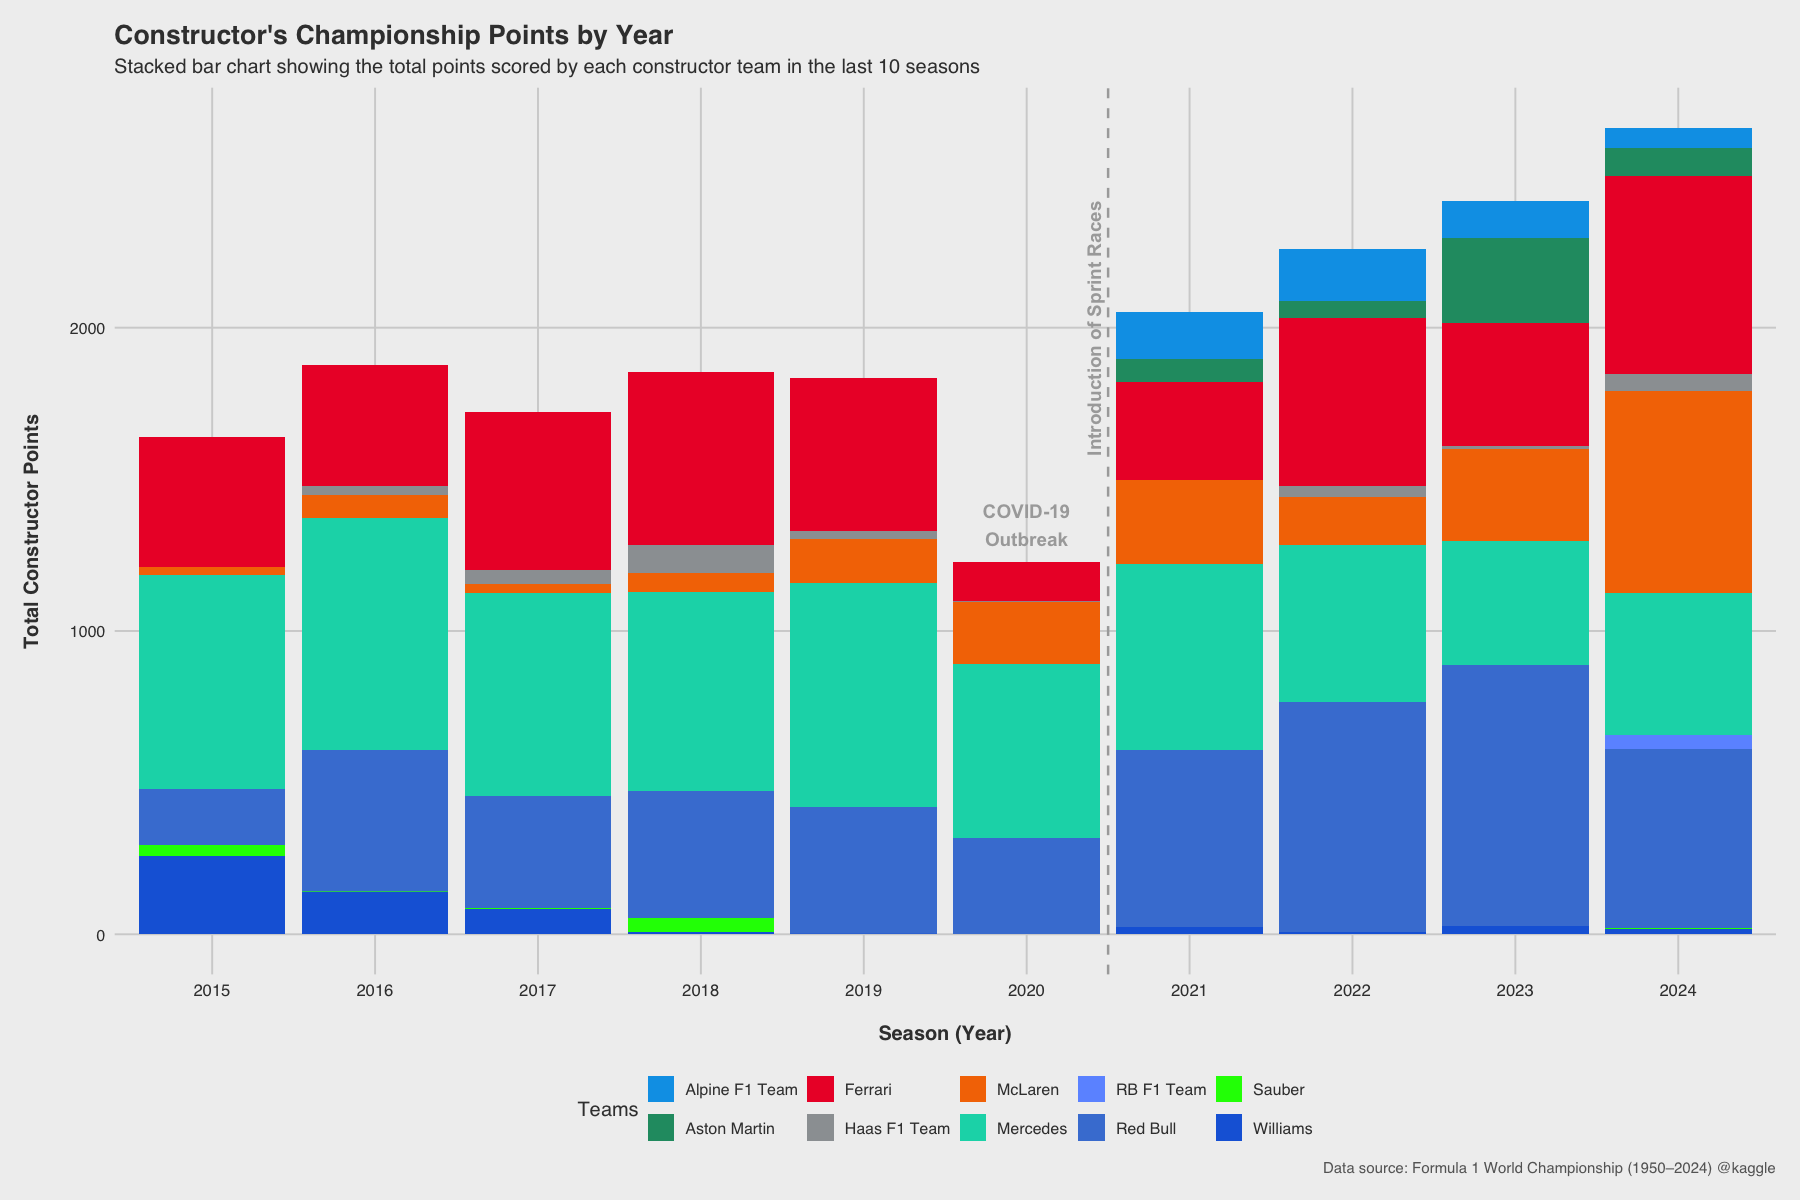

In [177]:
teamNames2024 <- c(
  "McLaren",
  "Ferrari",
  "Red Bull",
  "Mercedes",
  "Aston Martin",
  "Alpine F1 Team",
  "Haas F1 Team",
  "RB F1 Team",
  "Williams",
  "Sauber"
)

# Summarize total points per team per year
points_by_team_year <- constructor_data %>%
  group_by(year, teamName, official_color) %>%
  summarise(total_points = sum(points, na.rm = TRUE), .groups = "drop") %>%
  filter(year > 2014) %>%
  filter(teamName %in% teamNames2024)

# Create a named vector for team colors
team_colors <- setNames(points_by_team_year$official_color, points_by_team_year$teamName)

ConstructorChampionshipPoints <- ggplot(points_by_team_year, aes(x = factor(year), y = total_points, fill = teamName)) +
  geom_col() +
  labs(
    title = "Constructor's Championship Points by Year",
    subtitle = "Stacked bar chart showing the total points scored by each constructor team in the last 10 seasons",
    x = "Season (Year)",
    y = "Total Constructor Points",
    fill = "Teams",
    caption = "Data source: Formula 1 World Championship (1950–2024) @kaggle"
  ) +
  theme_fivethirtyeight() +
  scale_fill_manual(values = team_colors) +
  theme(
    axis.title.x = element_text(margin = margin(t = 16), size = 12, face = "bold"),
    axis.title.y = element_text(margin = margin(r = 16), size = 12, face = "bold"),
    axis.text.x = element_text(size = 10),
    plot.title = element_text(size = 16, face = "bold"),
    plot.subtitle = element_text(size = 12),
    plot.caption = element_text(size = 9, color = "gray40")
  ) +
  # Add vertical line after 2020 (between 2020 and 2021)
  geom_vline(xintercept = which(levels(factor(points_by_team_year$year)) == "2020") + 0.5, 
             linetype = "dashed", color = "darkgrey", linewidth = 0.7) +
  # Annotate the vertical line
  annotate(
    "text",
    x = which(levels(factor(points_by_team_year$year)) == "2020") + 0.5,
    y = 2000,
    label = "Introduction of Sprint Races",
    color = "darkgrey",
    angle = 90,
    vjust = -0.5,
    size = 4,
    fontface = "bold"
  ) +
  # Annotate 2020 as COVID-19
  annotate(
    "text",
    x = which(levels(factor(points_by_team_year$year)) == "2020"),
    y = 1350,
    label = "COVID-19\nOutbreak",
    color = "darkgrey",
    size = 4,
    fontface = "bold"
  )

print(ConstructorChampionshipPoints)

In [157]:
qualifying <- read_csv("qualifying.csv", show_col_types = FALSE)
results <- read_csv("results.csv", show_col_types = FALSE)

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)”


In [181]:
constructor_stats <- constructors %>%
  select(constructorId, constructorRef, name, nationality) %>%
  left_join(
    # Calculate wins (position = 1)
    results %>%
      filter(position == 1) %>%
      count(constructorId, name = "wins"),
    by = "constructorId"
  ) %>%
  left_join(
    # Calculate poles (grid position = 1)
    results %>%
      filter(grid == 1) %>%
      count(constructorId, name = "poles"),
    by = "constructorId"
  ) %>%
  left_join(
    # Calculate podiums (position 1, 2, or 3)
    results %>%
      filter(position %in% c(1, 2, 3)) %>%
      count(constructorId, name = "podiums"),
    by = "constructorId"
  ) %>%
  left_join(
    # Calculate fastest laps (rank = 1 in fastestLap)
    results %>%
      filter(rank == 1 & !is.na(rank)) %>%
      count(constructorId, name = "fastest_laps"),
    by = "constructorId"
  ) %>%
  left_join(
    # Calculate Q3 appearances (position 1-10 in qualifying)
    qualifying %>%
      filter(position <= 10) %>%
      count(constructorId, name = "q3_appearances"),
    by = "constructorId"
  ) %>%
  left_join(
    # Calculate Q2 appearances (position 1-15 in qualifying, those who made it past Q1)
    qualifying %>%
      filter(position <= 15 & !is.na(q2)) %>%
      count(constructorId, name = "q2_appearances"),
    by = "constructorId"
  ) %>%
  # Replace NA values with 0
  mutate(
    wins = coalesce(wins, 0),
    poles = coalesce(poles, 0),
    podiums = coalesce(podiums, 0),
    fastest_laps = coalesce(fastest_laps, 0),
    q3_appearances = coalesce(q3_appearances, 0),
    q2_appearances = coalesce(q2_appearances, 0)
  ) %>%
  # Calculate additional useful metrics
  mutate(
    # Total race entries
    total_races = map_dbl(constructorId, ~ sum(results$constructorId == .x, na.rm = TRUE)),
    # Win percentage
    win_percentage = round((wins / total_races) * 100, 2),
    # Podium percentage  
    podium_percentage = round((podiums / total_races) * 100, 2),
    # Points scored (sum of all points)
    total_points = map_dbl(constructorId, ~ sum(results$points[results$constructorId == .x], na.rm = TRUE))
  ) %>%
  # Arrange by wins descending, then by podiums
  arrange(desc(wins), desc(podiums), desc(total_points)) %>%
  filter(name %in% teamNames2024) %>%
  arrange(desc(wins), desc(podiums))

# Display the results
print("Constructor Statistics Summary:")
(constructor_stats)


[1] "Constructor Statistics Summary:"


constructorId,constructorRef,name,nationality,wins,poles,podiums,fastest_laps,q3_appearances,q2_appearances,total_races,win_percentage,podium_percentage,total_points
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,ferrari,Ferrari,Italian,249,258,841,96,853,944,2439,10.21,34.48,11091.27
1,mclaren,McLaren,British,185,164,508,60,674,883,1923,9.62,26.42,7022.50
131,mercedes,Mercedes,German,129,142,298,99,549,591,652,19.79,45.71,7730.64
9,red_bull,Red Bull,Austrian,122,103,282,99,617,732,788,15.48,35.79,7673.00
3,williams,Williams,British,114,128,313,7,423,674,1676,6.80,18.68,3641.00
214,alpine,Alpine F1 Team,French,1,0,6,1,81,144,180,0.56,3.33,498.00
15,sauber,Sauber,Swiss,0,0,10,3,125,380,837,0.00,1.19,561.00
117,aston_martin,Aston Martin,British,0,0,9,3,72,130,191,0.00,4.71,492.00
210,haas,Haas F1 Team,American,0,0,0,3,92,221,380,0.00,0.00,293.00


In [203]:
# Load required libraries
library(fmsb)
library(gridExtra)
options(repr.plot.width =15, repr.plot.height =10)


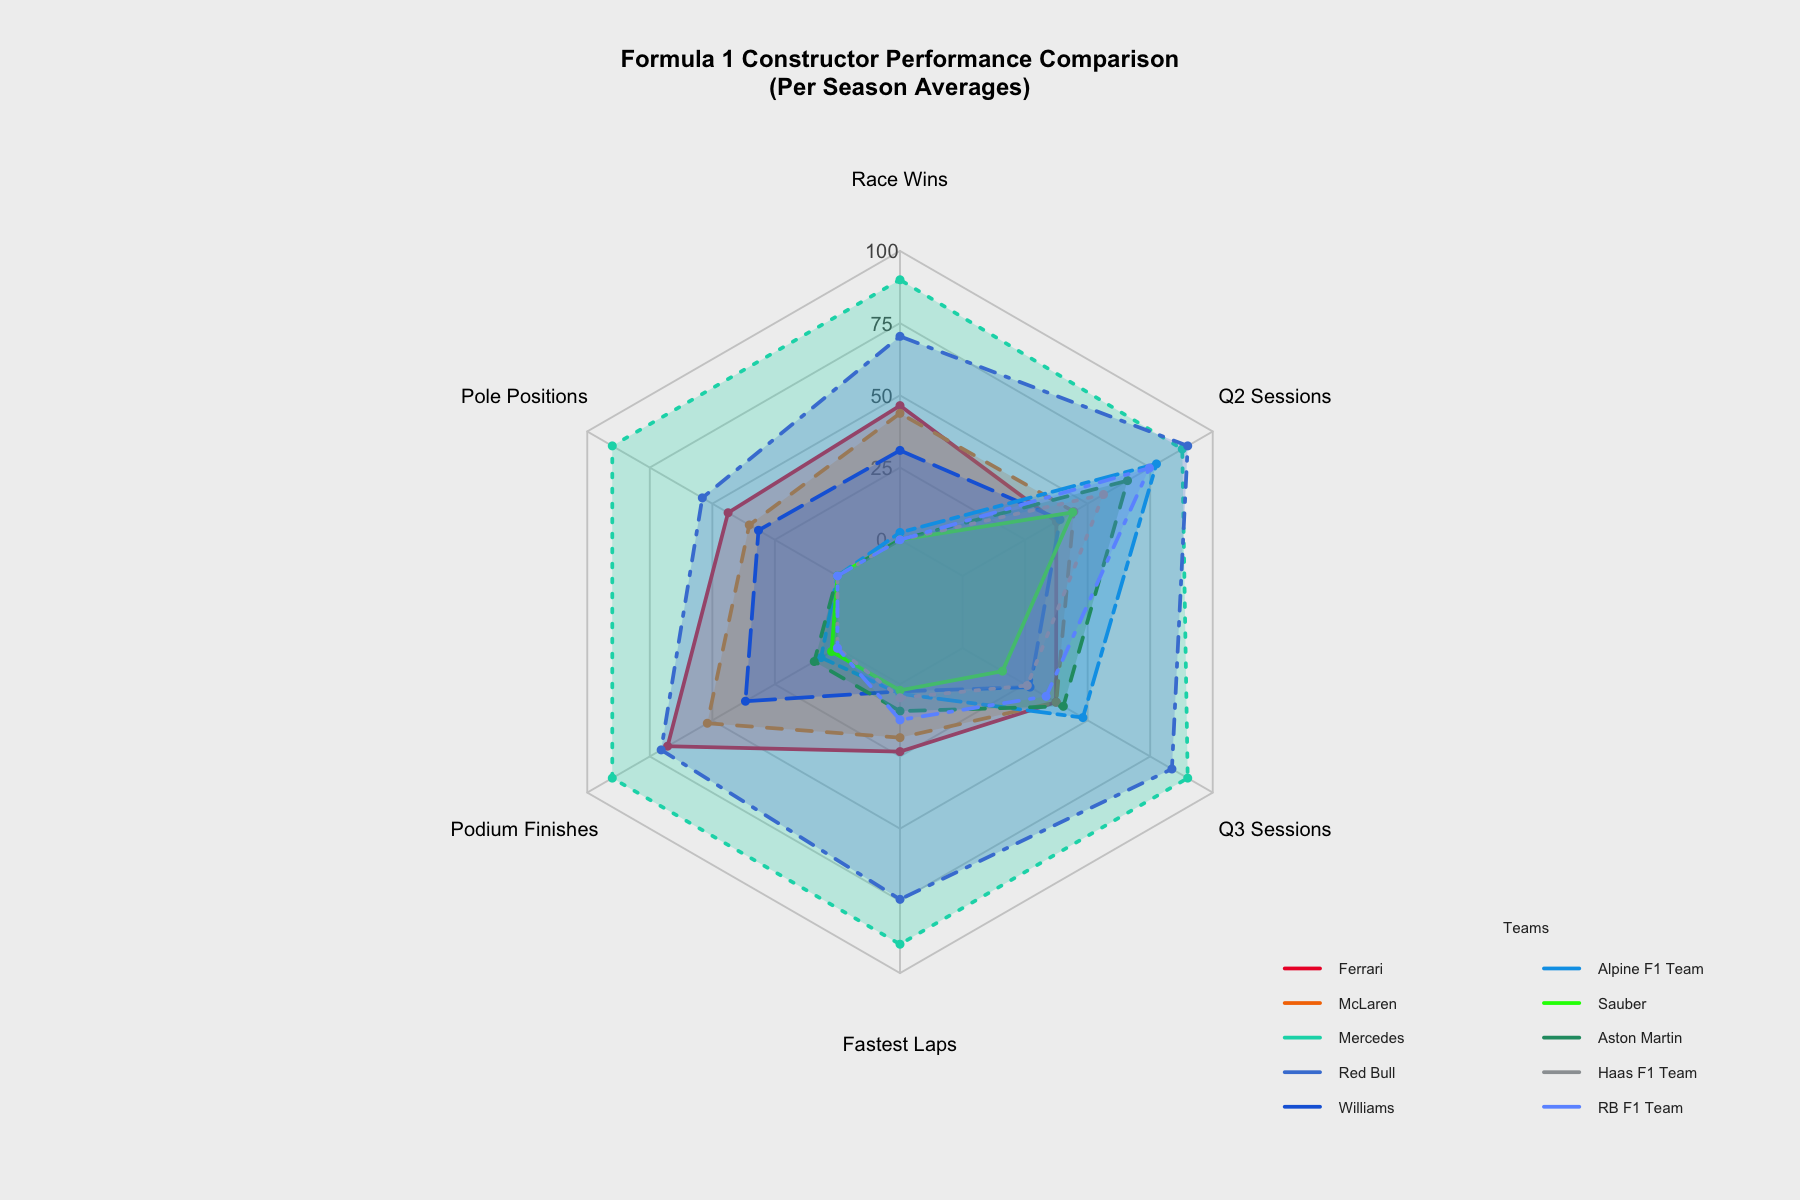

In [245]:
# Combined spider chart with theme and improved legend positioning
par(bg = "#f0f0f0", family = "Arial", mar = c(5, 4, 6, 4))

constructors_radar_plot <- radarchart(radar_data, 
         axistype = 1,
         pcol = team_colors,
         pfcol = scales::alpha(team_colors, 0.25),
         plwd = 3,
         cglcol = "#cccccc",
         cglty = 1,
         cglwd = 1.5,
         axislabcol = "#525252",
         caxislabels = seq(0, 100, 25),
         title = "Formula 1 Constructor Performance Comparison\n(Per Season Averages)",
         vlabels = c("Race Wins", "Pole Positions", "Podium Finishes", 
                    "Fastest Laps", "Q3 Sessions", "Q2 Sessions"))

# Add legend outside the plot area
legend(
 x = 1, y = -0.8,              # Position below the plot
 legend = scaled_data$name,
 col = team_colors,
 lty = 1,
 lwd = 3,
 cex = 0.75,
 bg = "#f0f0f0",
 text.col = "#2c2c2c",
 xpd = TRUE,                      # Allow drawing outside plot region
 bty = "n",                       # No box around legend
 seg.len = 1.5,
 y.intersp = 1.1,
 ncol = 2,                        
 x.intersp = 0.8,
    title = "Teams",
 horiz = FALSE
)

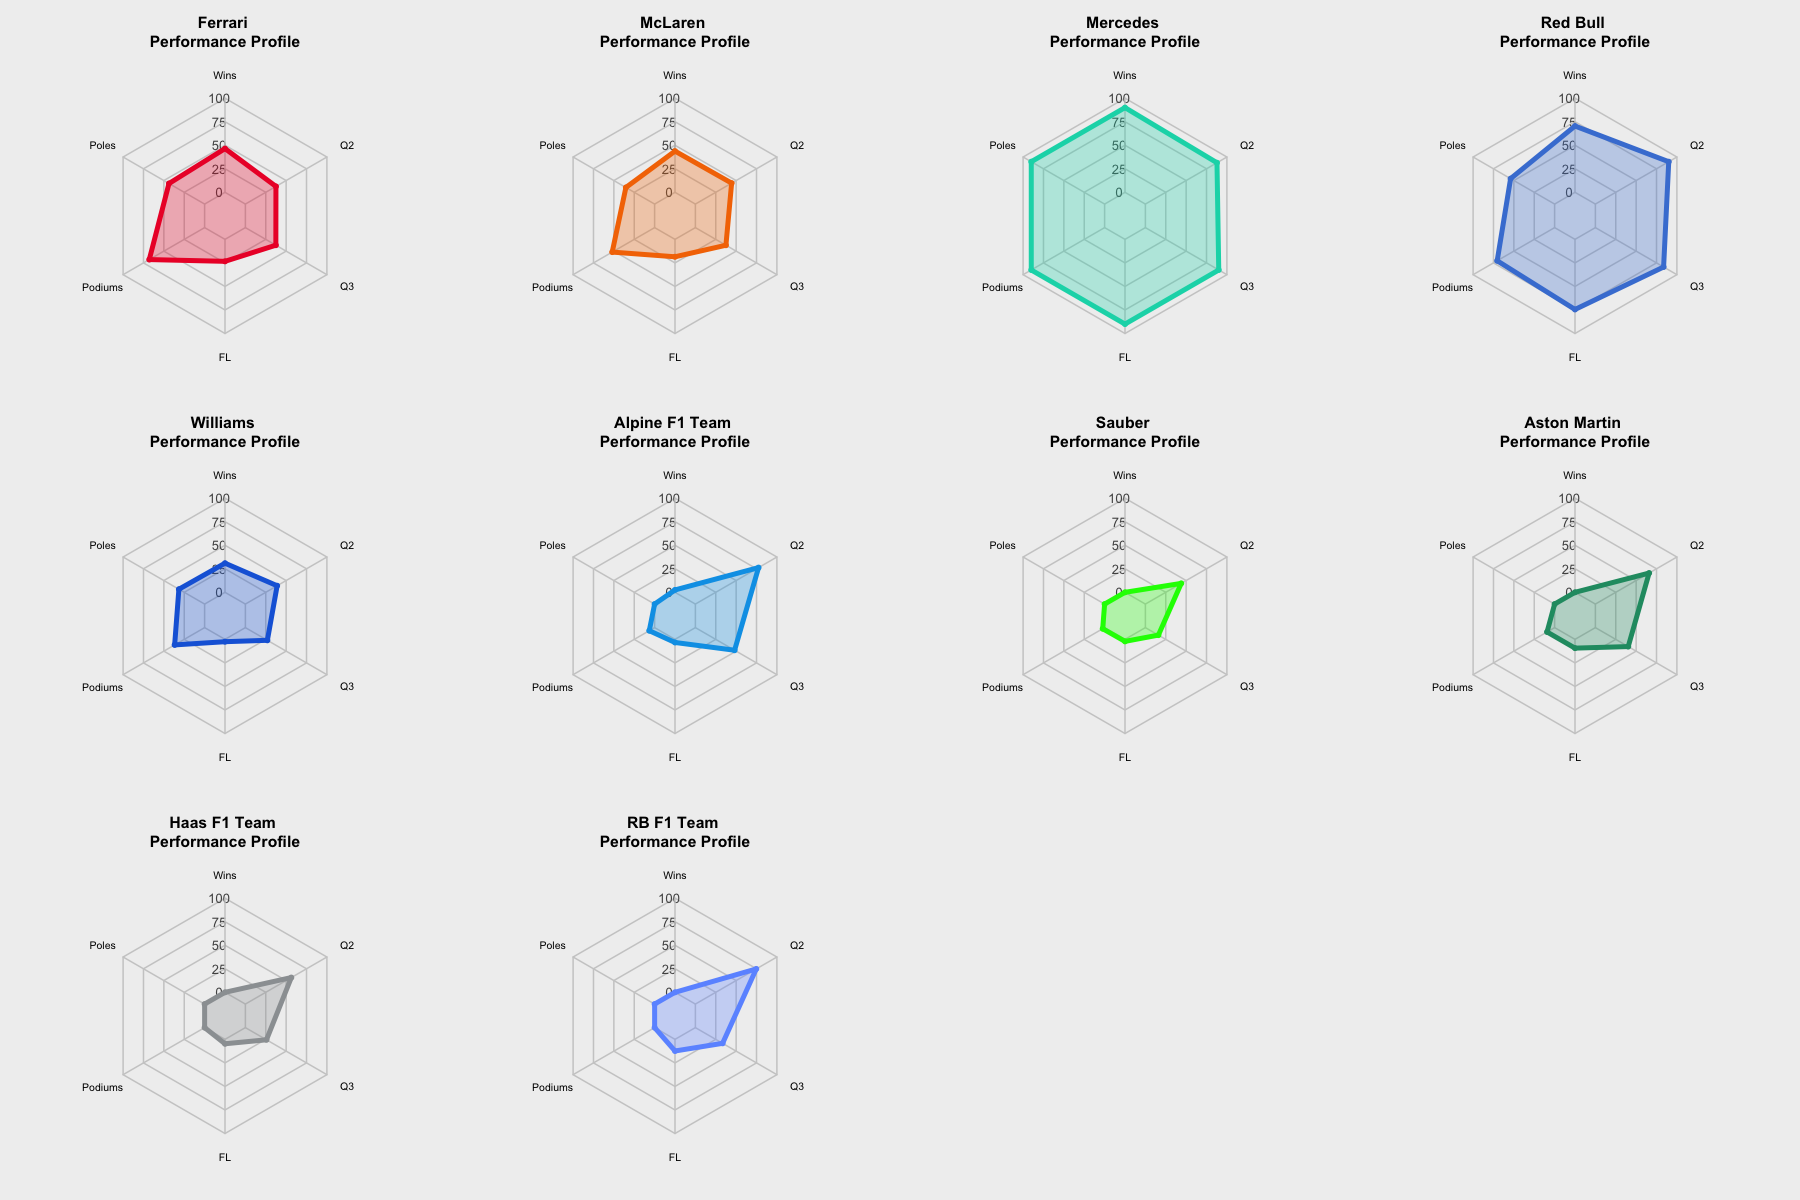

In [209]:

# Individual spider charts using fmsb
par(mfrow = c(3, 4), mar = c(2, 2, 4, 2), bg = "#f0f0f0", family = "Arial")

for(i in 1:nrow(scaled_data)) {
 team_data <- rbind(rep(100, 6), rep(0, 6), radar_data[i + 2, ])
 team_color <- team_color_mapping[scaled_data$constructorRef[i]]
 
 radarchart(team_data,
            axistype = 1,
            pcol = team_color,
            pfcol = scales::alpha(team_color, 0.3),
            plwd = 4,
            cglcol = "#cccccc",
            cglty = 1,
            cglwd = 1.2,
            axislabcol = "#525252",
            caxislabels = seq(0, 100, 25),
            title = paste(scaled_data$name[i], "\nPerformance Profile"),
            vlcex = 0.8,
            vlabels = c("Wins", "Poles", "Podiums", "FL", "Q3", "Q2"))
}

# # Add main title and subtitle
# title(main = "Formula 1 Constructor Performance Radar Charts",
#       sub  = "Each chart shows a team's normalized performance profile (per season averages)",
#       outer = TRUE, cex.main = 1.6, cex.sub = 1.1, col.main = "#2c2c2c", col.sub = "#525252")



# Reset par
par(mfrow = c(1, 1))

In [222]:
head(scaled_data)

name,constructorRef,wins_scaled,poles_scaled,podiums_scaled,fastest_laps_scaled,q3_scaled,q2_scaled
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ferrari,ferrari,46.439543,43.71290,67.898165,23.329979,37.38135,37.49884
McLaren,mclaren,43.761564,35.24247,52.018553,18.493831,37.46264,44.48761
Mercedes,mercedes,90.000000,90.00000,90.000000,90.000000,90.00000,87.82083
Red Bull,red_bull,70.426160,54.01480,70.468777,74.467005,83.69060,90.00000
Williams,williams,30.940778,31.56005,36.774279,2.475591,26.97641,38.96221
Alpine F1 Team,alpine,2.527132,0.00000,6.563758,3.292929,48.09836,77.50820


In [246]:
library(GGally)

constructors_parcord_plot <- ggparcoord(
  data = scaled_data,
  columns = c("wins_scaled", "poles_scaled", "podiums_scaled", "fastest_laps_scaled", "q3_scaled", "q2_scaled"),
  groupColumn = "name",
  scale = "uniminmax",
  showPoints = TRUE,
  alphaLines = 0.7,
    order = "skewness"
) +
  scale_x_discrete(
    labels = c(
      wins_scaled = "Wins",
      poles_scaled = "Poles",
      podiums_scaled = "Podiums",
      fastest_laps_scaled = "Fastest Laps",
      q3_scaled = "Q3 Appearances",
      q2_scaled = "Q2 Appearances"
    )
  ) +
  labs(
    title = "Formula 1 Constructor Performance: Parallel Coordinate Plot",
    subtitle = "Each line represents a team's normalized performance profile",
    x = "Performance Metric",
    y = "Normalized Value",
    fill = "Team",
    caption = "Data source: Formula 1 World Championship (1950–2024) @kaggle"
  ) +
  theme_fivethirtyeight() +
  theme(
    axis.title.x = element_text(margin = margin(t = 16), size = 12, face = "bold"),
    axis.title.y = element_text(margin = margin(r = 16), size = 12, face = "bold"),
    axis.text.x = element_text(size = 10),
    plot.title = element_text(size = 16, face = "bold"),
    plot.subtitle = element_text(size = 12),
    plot.caption = element_text(size = 9, color = "gray40")
  )


In [248]:
ggsave("constructors_parcord_plot.png", plot = constructors_parcord_plot, width = 15, height = 10, dpi = 300)
ggsave("constructors_radar_plot.png", plot = constructors_radar_plot, width = 15, height = 10, dpi = 300)
ggsave("ConstructorChampionshipPoints.png", plot = ConstructorChampionshipPoints, width = 15, height = 10, dpi = 300)
ggsave("constructors_box_plot.png", plot = constructors_box_plot, width = 15, height = 10, dpi = 300)

In [249]:
ggsave("constructors_violin_plot.png", plot = constructors_violin_plot, width = 15, height = 10, dpi = 300)

In [250]:
ggsave("constructors_sep_violin_plot.png", plot = constructors_sep_violin_plot, width = 15, height = 10, dpi = 300)